In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("white")

import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.exfor.data_utilities as exfor_utils
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
import nucml.model.model_building as model_building
import nucml.model.model_utilities as model_utils
import nucml.general_utilities as gen_utils
import nucml.ace.plotting_utilities as ace_plots

In [2]:
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
importlib.reload(model_building)
importlib.reload(model_utils)
importlib.reload(ace_plots)
print("Finish re-loading scripts.")

Finish re-loading scripts.


In [3]:
figure_dir = "Figures/"

In [6]:
sns.set(font_scale=2.5)
sns.set_style('white')

# Gathering Results from Benchmark Calculations

In [10]:
dt_results_b0 = ace_utils.gather_benchmark_results("acedata_ml/U233/DT_B0/")
dt_results_b1 = ace_utils.gather_benchmark_results("acedata_ml/U233/DT_B1/")
dt_results_b2 = ace_utils.gather_benchmark_results("acedata_ml/U233/DT_B2/")

# Analyzing Decision Tree Results

In [11]:
to_append_dt_b0 = pd.read_csv("../ML_EXFOR_neutrons/2_DT/DT_B0/dt_results.csv")
to_append_dt_b0["Model"] = to_append_dt_b0.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_dt_b0 = to_append_dt_b0[["Model", "train_mae", "val_mae", "test_mae", "normalizer", "max_depth", "mss", "msl"]]

to_append_dt_b1 = pd.read_csv("../ML_EXFOR_neutrons/2_DT/DT_B1/dt_results.csv")
to_append_dt_b1["Model"] = to_append_dt_b1.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_dt_b1 = to_append_dt_b1[["Model", "train_mae", "val_mae", "test_mae", "normalizer", "max_depth", "mss", "msl"]]

to_append_dt_b2 = pd.read_csv("../ML_EXFOR_neutrons/2_DT/DT_B2/dt_results.csv")
to_append_dt_b2["Model"] = to_append_dt_b2.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_dt_b2 = to_append_dt_b2[["Model", "train_mae", "val_mae", "test_mae", "normalizer", "max_depth", "mss", "msl"]]

In [12]:
dt_final_b0 = dt_results_b0.merge(to_append_dt_b0, on="Model")
dt_final_b1 = dt_results_b1.merge(to_append_dt_b1, on="Model")
dt_final_b2 = dt_results_b2.merge(to_append_dt_b2, on="Model")

In [14]:
dt_final_b0["dataset"] = "B0"
dt_final_b1["dataset"] = "B1"
dt_final_b2["dataset"] = "B2"

In [15]:
dt_final = dt_final_b0.append(dt_final_b1)
dt_final = dt_final.append(dt_final_b2)

In [16]:
model_utils.get_best_models_df(dt_final)

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,dataset,tag
264,DT400_MSS2_MSL1_power_yeo_one_hot_B0_v5,1.001390,0.00128,1.002720,0.00093,0.001390,0.002720,0.025777,0.135714,0.135254,power_yeo,400,2,1.0,B0,Train
161,DT70_MSS10_MSL7_standard_one_hot_B2_v5,0.878782,0.00143,0.879436,0.00082,0.121218,0.120564,0.094574,0.118242,0.118858,standard,70,10,7.0,B2,Val
11,DT105_MSS10_MSL7_standard_one_hot_B1_v5,1.002660,0.00155,1.001430,0.00090,0.002660,0.001430,0.094585,0.119694,0.118671,standard,105,10,7.0,B1,Test


In [19]:
dt_final.sort_values(by="Deviation_Ana")

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,dataset
13,DT100_MSS15_MSL7_standard_one_hot_B0_v5,0.999986,0.00134,0.999747,0.00094,0.000014,0.000253,0.094735,0.119564,0.119406,standard,100,15,7.0,B0
215,DT310_MSS15_MSL1_standard_one_hot_B0_v5,1.000020,0.00128,0.999413,0.00094,0.000020,0.000587,0.079405,0.123328,0.122877,standard,310,15,1.0,B0
63,DT130_MSS15_MSL1_standard_one_hot_B0_v5,1.000020,0.00147,0.999214,0.00103,0.000020,0.000786,0.079611,0.123247,0.122789,standard,130,15,1.0,B0
26,DT110_MSS10_MSL5_standard_one_hot_B0_v5,0.999973,0.00139,0.998799,0.00090,0.000027,0.001201,0.088348,0.119878,0.119798,standard,110,10,5.0,B0
4,DT100_MSS10_MSL5_standard_one_hot_B0_v5,1.000040,0.00138,0.999120,0.00099,0.000040,0.000880,0.088350,0.119874,0.119792,standard,100,10,5.0,B0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,DT100_MSS10_MSL5_standard_one_hot_B2_v5,0.878364,0.00143,0.878515,0.00087,0.121636,0.121485,0.088439,0.118735,0.119295,standard,100,10,5.0,B2
165,DT70_MSS15_MSL5_standard_one_hot_B2_v5,0.878008,0.00149,0.879359,0.00086,0.121992,0.120641,0.091655,0.118563,0.119218,standard,70,15,5.0,B2
186,DT90_MSS10_MSL7_standard_one_hot_B2_v5,0.878004,0.00144,0.879602,0.00087,0.121996,0.120398,0.094546,0.118261,0.118824,standard,90,10,7.0,B2
15,DT110_MSS15_MSL5_standard_one_hot_B2_v5,0.877954,0.00134,0.879320,0.00085,0.122046,0.120680,0.091610,0.118551,0.119216,standard,110,15,5.0,B2


In [23]:
dt_final_b1.sort_values(by="Deviation_Imp")

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,dataset
181,DT80_MSS10_MSL7_standard_one_hot_B1_v5,0.999775,0.00133,1.00015,0.00095,0.000225,0.00015,0.094590,0.119664,0.118673,standard,80,10,7.0,B1
64,DT180_MSS2_MSL1_standard_one_hot_B1_v5,1.000940,0.00137,1.00097,0.00097,0.000940,0.00097,0.026004,0.135558,0.134518,standard,180,2,1.0,B1
12,DT105_MSS15_MSL7_standard_one_hot_B1_v5,1.002600,0.00133,1.00101,0.00092,0.002600,0.00101,0.094910,0.119734,0.118764,standard,105,15,7.0,B1
91,DT250_MSS15_MSL1_standard_one_hot_B1_v5,0.999837,0.00136,1.00139,0.00098,0.000163,0.00139,0.079466,0.122913,0.121986,standard,250,15,1.0,B1
11,DT105_MSS10_MSL7_standard_one_hot_B1_v5,1.002660,0.00155,1.00143,0.00090,0.002660,0.00143,0.094585,0.119694,0.118671,standard,105,10,7.0,B1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,DT110_MSS10_MSL5_standard_one_hot_B1_v5,1.007940,0.00107,1.00747,0.00076,0.007940,0.00747,0.088529,0.120153,0.119081,standard,110,10,5.0,B1
6,DT100_MSS15_MSL5_standard_one_hot_B1_v5,1.007030,0.00130,1.00757,0.00083,0.007030,0.00757,0.091665,0.119986,0.118881,standard,100,15,5.0,B1
31,DT124_MSS10_MSL5_standard_one_hot_B1_v5,1.006630,0.00141,1.00774,0.00101,0.006630,0.00774,0.088526,0.120179,0.119081,standard,124,10,5.0,B1
173,DT70_MSS15_MSL5_standard_one_hot_B1_v5,1.006600,0.00144,1.00815,0.00094,0.006600,0.00815,0.091692,0.120020,0.118905,standard,70,15,5.0,B1


In [25]:
model_utils.get_best_models_df(dt_final_b1)

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,dataset,tag
152,DT400_MSS2_MSL1_standard_one_hot_B1_v5,1.004660,0.00149,1.00450,0.00106,0.004660,0.00450,0.025832,0.135616,0.134573,standard,400,2,1.0,B1,Train
181,DT80_MSS10_MSL7_standard_one_hot_B1_v5,0.999775,0.00133,1.00015,0.00095,0.000225,0.00015,0.094590,0.119664,0.118673,standard,80,10,7.0,B1,Val
11,DT105_MSS10_MSL7_standard_one_hot_B1_v5,1.002660,0.00155,1.00143,0.00090,0.002660,0.00143,0.094585,0.119694,0.118671,standard,105,10,7.0,B1,Test


In [26]:
dt_final_b2.sort_values(by="Deviation_Imp")

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,dataset
88,DT260_MSS2_MSL1_standard_one_hot_B2_v5,1.000290,0.00128,1.000160,0.00084,0.000290,0.000160,0.025882,0.134055,0.135118,standard,260,2,1.0,B2
136,DT380_MSS2_MSL1_standard_one_hot_B2_v5,0.999837,0.00144,1.000870,0.00094,0.000163,0.000870,0.025824,0.134088,0.135197,standard,380,2,1.0,B2
114,DT330_MSS10_MSL1_standard_one_hot_B2_v5,1.002710,0.00139,1.000960,0.00087,0.002710,0.000960,0.069984,0.124341,0.124729,standard,330,10,1.0,B2
72,DT220_MSS2_MSL1_standard_one_hot_B2_v5,1.001850,0.00130,1.001060,0.00090,0.001850,0.001060,0.025912,0.134067,0.135089,standard,220,2,1.0,B2
128,DT360_MSS2_MSL1_standard_one_hot_B2_v5,1.001550,0.00123,1.001130,0.00092,0.001550,0.001130,0.025836,0.134073,0.135143,standard,360,2,1.0,B2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,DT80_MSS10_MSL7_standard_one_hot_B2_v5,0.877351,0.00147,0.878831,0.00086,0.122649,0.121169,0.094557,0.118264,0.118823,standard,80,10,7.0,B2
153,DT60_MSS15_MSL5_standard_one_hot_B2_v5,0.879035,0.00159,0.878678,0.00112,0.120965,0.121322,0.091733,0.118578,0.119191,standard,60,15,5.0,B2
2,DT100_MSS10_MSL5_standard_one_hot_B2_v5,0.878364,0.00143,0.878515,0.00087,0.121636,0.121485,0.088439,0.118735,0.119295,standard,100,10,5.0,B2
160,DT70_MSS10_MSL5_standard_one_hot_B2_v5,0.879552,0.00130,0.878010,0.00080,0.120448,0.121990,0.088488,0.118710,0.119309,standard,70,10,5.0,B2


In [75]:
dt_final = dt_final[dt_final.K_eff_ana > 0.97]
# dt_final.K_eff_ana.min()

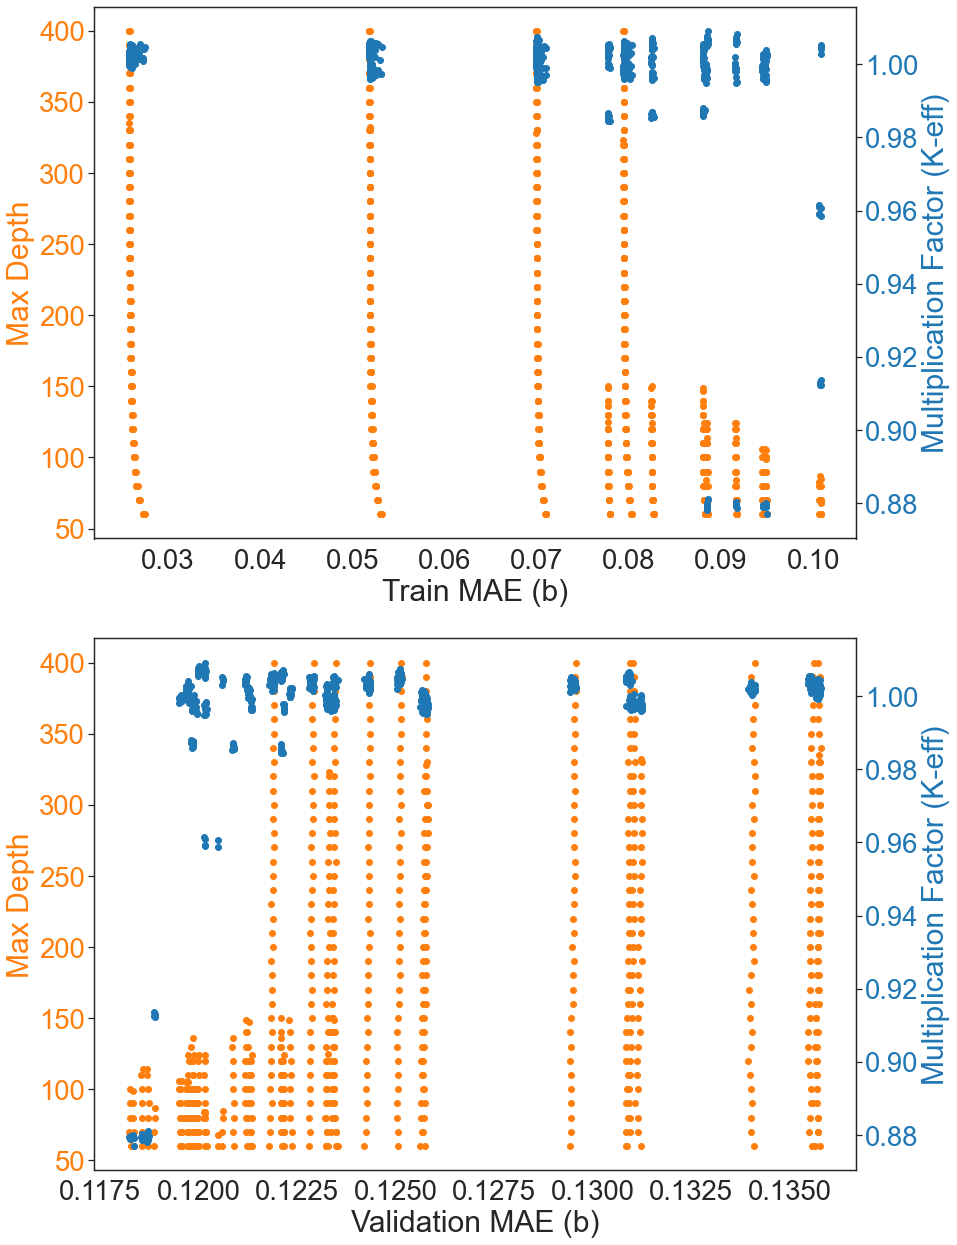

In [17]:
ace_plots.make_dt_keff_plot(dt_final, "train_mae", "val_mae", "max_depth", "K_eff_imp", save=False, saving_dir=figure_dir)